In [1]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import numpy as np

# import os
# import sys
# sys.path.insert(0, os.path.abspath('/home/gaspar/git/pyha'))

# Overview


## Digital data to be transmitted

<IPython.core.display.Javascript object>


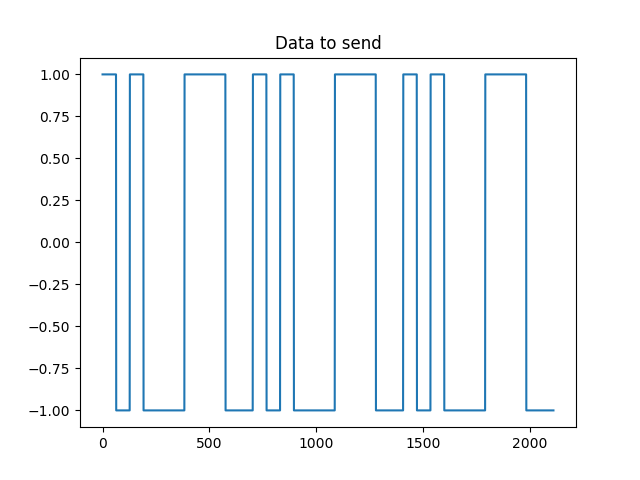

In [2]:
samples_per_symbol = 64 # this is so high to make stuff plottable
symbols = [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]

data = []
for x in symbols:
    data.extend([1 if x else -1] * samples_per_symbol)

plt.plot(data)
plt.title('Data to send')
plt.show()

## Modulation

In [3]:
fs = 300e3
deviation = 70e3  # deviation from center frequency
sensitivity = 2 * np.pi * deviation / fs
print(sensitivity)

1.4660765716752366


In [4]:
d_phase = 0
phl = []
for symbol in data:
    d_phase += symbol * sensitivity  # this is FSK
    d_phase = ((d_phase + np.pi) % (2.0 * np.pi)) - np.pi  # keep in pi range
    phl.append(d_phase * 1j)

sig = np.exp(phl)

# awgn channel
# sig = sig + np.random.normal(scale=np.sqrt(0.1))

<IPython.core.display.Javascript object>


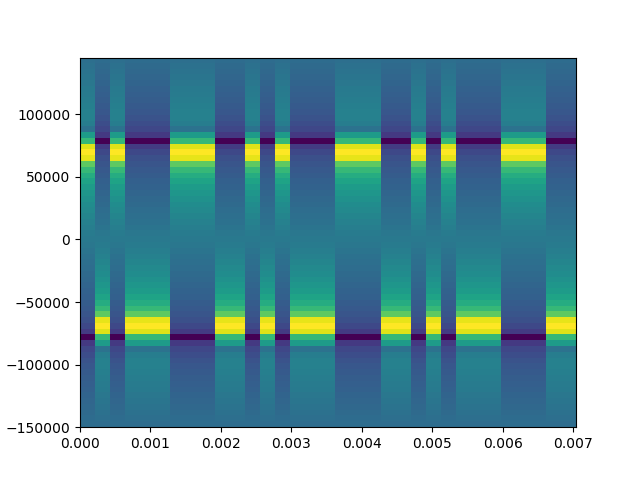

In [5]:
Pxx, freqs, bins, im = plt.specgram(sig, Fs=fs, NFFT=64, noverlap=0)
plt.show()

Spectogram shows that we have synthesized positive frequency for True bit and negative for False.
This complex data can be sent to SDR at this point.